In [40]:
from pprint import pprint
from math import ceil
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import load_best_result, save_search_result
from loaders import load_mnist
from plotters import gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_learning_curve, plot_validation_curve

### Load Data

In [2]:
df = load_mnist(preprocess=True)

1    6958
0    6824
Name: target, dtype: int64


/home/jovyan/loaders.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_df['target'] = le.fit_transform(filtered_df['target'])


### Split data into training and testing

In [3]:
from sklearn.model_selection import train_test_split

X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Scale Data

In [4]:
# Use min max scaling because input dataset is sparse, i.e. mostly zeros
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## AdaBoost Model Complexity

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

base_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [6]:
param_grid = {
    'n_estimators': [1, 10, 20, 50, 100, 150, 200, 250, 300, 400],
    'base_estimator__max_depth': range(1, 6),
    'learning_rate': [.5, .75, 1.0]
}

In [7]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [8]:
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1 ..
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1 ..
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1 ..
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1, score=0.8528802320762536, total=   0.4s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1, score=0.8602819237147595, total=   0.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1, score=0.8635420987142265, total=   0.6s
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=1, score=0.8652011613438407, total=   0.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=10 .


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s


[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=10, score=0.8967233513065118, total=   2.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=10, score=0.8987971795935297, total=   2.6s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20, score=0.9063406547865728, total=   5.6s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20, score=0.9145936981757877, total=   5.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20, score=0.9228535877229366, total=   5.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50 .


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s


[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=20, score=0.919535462463708, total=   5.8s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50 .
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50, score=0.9431771049357113, total=  13.3s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50, score=0.9440298507462687, total=  13.8s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50, score=0.9407376709490262, total=  14.0s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=50, score=0.9531314807133969, total=  13.5s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100, score=0.95317032739

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   51.7s


[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100, score=0.962671090833679, total=  28.0s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100, score=0.9535655058043118, total=  28.3s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=100, score=0.9585234342596433, total=  28.8s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150, score=0.9560712805636138, total=  40.4s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150, score=0.9597844112769486, total=  40.2s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=150, score=0.964330

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min


[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200, score=0.9589722337339411, total=  52.4s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200, score=0.964759535655058, total=  52.8s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200, score=0.9647449191206968, total=  53.3s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=200, score=0.9659892160929076, total=  54.3s
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250, score=0.9622876087857439, total= 1.0min
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=300 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=250, score=0.965588

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min


[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=300, score=0.9672470978441128, total= 1.2min
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=400 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=300, score=0.9676482787225218, total= 1.3min
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=400 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=300, score=0.9672335130651182, total= 1.3min
[CV] base_estimator__max_depth=1, learning_rate=0.5, n_estimators=400 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=400, score=0.9664318276004973, total= 1.7min
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=1 .
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=1, score=0.8528802320762536, total=   0.4s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=1 .
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=1, score=0.8602819

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min


[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10, score=0.888520513883133, total=   2.5s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10, score=0.8930348258706468, total=   2.7s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10, score=0.9133139776026545, total=   2.8s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=20 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=10, score=0.9025300705101618, total=   2.6s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=20 
[CV]  base_estimator__max_depth=1, learning_rate=0.5, n_estimators=400, score=0.9684778100373289, total= 1.8min
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=20 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=20, score=0.920845

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  6.9min


[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=50, score=0.951077943615257, total=  13.2s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=50, score=0.9464952301949399, total=  13.5s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=50, score=0.9527167150559933, total=  12.7s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100, score=0.9577289680895151, total=  25.5s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100, score=0.9589381999170469, total=  25.4s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=100, score=

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.1min


[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=200, score=0.9647741400745959, total=  50.4s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=200, score=0.9705638474295191, total=  50.7s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=200, score=0.9676482787225218, total=  52.4s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=200, score=0.9672335130651182, total=  52.7s
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250, score=0.9664318276004973, total= 1.0min
[CV] base_estimator__max_depth=1, learning_rate=0.75, n_estimators=300 
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=250, sc

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 13.0min


[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1, score=0.8528802320762536, total=   0.4s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1 ..
[CV]  base_estimator__max_depth=1, learning_rate=0.75, n_estimators=400, score=0.9709784411276948, total= 1.7min
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1 ..
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1, score=0.8602819237147595, total=   0.3s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1 ..
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1, score=0.8635420987142265, total=   0.5s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=1, score=0.8652011613438407, total=   0.5s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=10, score=0.8868628263572

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 13.3min


[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=20, score=0.9336374948154292, total=   4.8s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50, score=0.9444674678823042, total=  11.9s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50, score=0.9519071310116086, total=  12.4s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50, score=0.9464952301949399, total=  13.0s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50, score=0.9552053090004148, total=  12.1s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100 
[CV]  base_estimato

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 15.3min


[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200, score=0.9659892160929076, total=  50.4s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200, score=0.9705638474295191, total=  51.7s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200, score=0.972210700953961, total=  52.4s
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250, score=0.9664318276004973, total= 1.1min
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=300 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250, score=0.9676616915422885, total= 1.1min
[CV] base_estimator__max_depth=1, learning_rate=1.0, n_estimators=300 
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=250, score=0.967648

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 19.4min


[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=1, score=0.9021153048527581, total=   0.6s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=400, score=0.9689054726368159, total= 1.6min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10, score=0.9374222958972234, total=   4.5s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10, score=0.9519071310116086, total=   4.2s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=1, learning_rate=1.0, n_estimators=400, score=0.9717959352965575, total= 1.6min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=20 .
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=10, score=0.9477395271

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 20.9min


[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=100, score=0.9838308457711443, total=  44.2s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=100, score=0.9792617171298217, total=  44.2s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=100, score=0.9838241393612609, total=  45.0s
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150, score=0.9834162520729685, total= 1.1min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150, score=0.9829946080464538, total= 1.1min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=150, score=0.98342

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.6min


[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=300, score=0.9825798423890502, total= 2.3min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=300, score=0.9900456242223143, total= 2.3min
[CV] base_estimator__max_depth=2, learning_rate=0.5, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=400, score=0.9846663903854124, total= 2.9min
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=1 .
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=1, score=0.8785743887277249, total=   0.5s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=1 .
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=1, score=0.9025704809286899, total=   0.5s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=1 .
[CV]  base_estimator__max_depth=2, learning_rate=0.5, n_estimators=400, score=0.9867330

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 31.2min


[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=50, score=0.978441127694859, total=  22.5s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=50, score=0.9800912484446288, total=  21.4s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=50, score=0.9809207797594359, total=  21.6s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100, score=0.9796933278077082, total=  42.5s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100, score=0.9830016583747927, total=  43.0s
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=100, score=

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 36.8min


[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=300, score=0.9834231247409864, total= 2.2min
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=300, score=0.9838308457711443, total= 2.2min
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=300, score=0.9850684363334716, total= 2.2min
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=300, score=0.9888013272501037, total= 2.4min
[CV] base_estimator__max_depth=2, learning_rate=0.75, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=0.75, n_estimators=400, score=0.985495234148363, total= 3.0min
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=1 ..
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=1, score=0

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 42.4min


[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50, score=0.9697221070095396, total=  20.5s
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50, score=0.9825798423890502, total=  21.7s
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100, score=0.9792703150912107, total=  46.8s
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100, score=0.9825942809780357, total=  47.6s
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100, score=0.9792617171298217, total=  47.5s
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=150 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100, score=0.9892160

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed: 49.9min


[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=300, score=0.9825798423890502, total= 2.2min
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=300, score=0.9896308585649108, total= 2.3min
[CV] base_estimator__max_depth=2, learning_rate=1.0, n_estimators=400 
[CV]  base_estimator__max_depth=2, learning_rate=1.0, n_estimators=400, score=0.9850808122668877, total= 2.9min
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1, score=0.9079983423124741, total=   0.7s
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1, score=0.9237147595356551, total=   0.8s
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=1, score=0.91538780588

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 54.8min


[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=100, score=0.9834093737038573, total= 1.0min
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=100, score=0.9900456242223143, total=  59.3s
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150, score=0.9838375466224617, total= 1.5min
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150, score=0.9854892205638475, total= 1.6min
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=200 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=150, score=0.9858979676482788, total= 1.6min
[CV] base_estimator__max_depth=3, learning_rate=0.5, n_estimators=200 
[CV]  base_est

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 68.2min


[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=1, score=0.9187059311489009, total=   0.9s
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=400, score=0.9892205638474295, total= 4.1min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10, score=0.9701616245337754, total=   6.2s
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10, score=0.9705638474295191, total=   6.0s
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10 
[CV]  base_estimator__max_depth=3, learning_rate=0.5, n_estimators=400, score=0.987557030277893, total= 4.1min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=20 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=10, score=0.9688925

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 73.8min


[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=200, score=0.9896351575456053, total= 2.0min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=200, score=0.9867274989630859, total= 2.1min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=200, score=0.987557030277893, total= 2.1min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250, score=0.9875673435557397, total= 2.5min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=300 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250, score=0.9900497512437811, total= 2.5min
[CV] base_estimator__max_depth=3, learning_rate=0.75, n_estimators=300 
[CV]  base_estimator__max_depth=3, learning_rate=0.75, n_estimators=250, sco

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 84.0min


[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=20, score=0.9709664039817503, total=  12.2s
[CV] base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=20, score=0.9771878888428038, total=  12.7s
[CV] base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50, score=0.9772067965188562, total=  30.6s
[CV] base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50, score=0.9830016583747927, total=  30.7s
[CV] base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50, score=0.9784321858150146, total=  30.1s
[CV] base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50, score=0.98175031107

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 98.7min


[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1, score=0.9096560298383755, total=   0.9s
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1, score=0.9336650082918739, total=   0.9s
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1, score=0.9265864786395687, total=   0.9s
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=1, score=0.9344670261302365, total=   0.9s
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=3, learning_rate=1.0, n_estimators=400, score=0.9888059701492538, total= 4.1min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=10 .
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=10, score=0.97016162453377

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 103.3min


[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=200, score=0.986318407960199, total= 2.4min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=200, score=0.985495234148363, total= 2.5min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=200, score=0.9842389050186644, total= 2.5min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=200, score=0.9912899211945251, total= 2.5min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250, score=0.9896351575456053, total= 3.1min
[CV] base_estimator__max_depth=4, learning_rate=0.5, n_estimators=300 
[CV]  base_estimator__max_depth=4, learning_rate=0.5, n_estimators=250, score=0.9867384

[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 118.6min


[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=50, score=0.9800995024875622, total=  37.6s
[CV] base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=50, score=0.981750311074243, total=  36.7s
[CV] base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=50, score=0.9825798423890502, total=  36.7s
[CV] base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100 
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100, score=0.9850808122668877, total= 1.3min
[CV] base_estimator__max_depth=4, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100, score=0.9850746268656716, total= 1.3min
[CV] base_estimator__max_depth=4, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=100, score=

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 136.5min


[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=400, score=0.9863127333056823, total= 5.1min
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10 .
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10, score=0.9734769995855781, total=   7.4s
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10 .
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10, score=0.9705638474295191, total=   7.3s
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=20 .
[CV]  base_estimator__max_depth=4, learning_rate=0.75, n_estimators=400, score=0.990460389879718, total= 5.1min
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=20 .
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10, score=0.9688925756947325, total=   8.1s
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=20 .
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=10, score=0.96889257

[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed: 150.3min


[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=300, score=0.9904643449419569, total= 3.7min
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=400 
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=300, score=0.9871422646204894, total= 3.8min
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=400 
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=300, score=0.9921194525093322, total= 3.8min
[CV] base_estimator__max_depth=4, learning_rate=1.0, n_estimators=400 
[CV]  base_estimator__max_depth=4, learning_rate=1.0, n_estimators=400, score=0.9863240779113137, total= 5.0min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=1, score=0.9386655615416494, total=   1.2s
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=1 ..
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=1, score=0.942371475

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 160.8min


[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=200, score=0.987981765437215, total= 2.9min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=200, score=0.9871422646204894, total= 2.9min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=200, score=0.988391376451078, total= 2.9min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=200, score=0.9900456242223143, total= 3.0min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250 
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250, score=0.9850808122668877, total= 3.7min
[CV] base_estimator__max_depth=5, learning_rate=0.5, n_estimators=300 
[CV]  base_estimator__max_depth=5, learning_rate=0.5, n_estimators=250, score=0.9896351

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 180.2min


[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=100, score=0.9871475953565506, total= 1.4min
[CV] base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=100, score=0.981750311074243, total= 1.4min
[CV] base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=100, score=0.9854832019908751, total= 1.4min
[CV] base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150 
[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150, score=0.9846663903854124, total= 2.1min
[CV] base_estimator__max_depth=5, learning_rate=0.75, n_estimators=200 
[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150, score=0.9908789386401327, total= 2.2min
[CV] base_estimator__max_depth=5, learning_rate=0.75, n_estimators=200 
[CV]  base_estimator__max_depth=5, learning_rate=0.75, n_estimators=150, sco

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed: 199.6min


[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=20, score=0.9701368726669432, total=  17.6s
[CV] base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=20, score=0.9684778100373289, total=  17.7s
[CV] base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50 .
[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50, score=0.9821798590965602, total=  43.3s
[CV] base_estimator__max_depth=5, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50, score=0.9805140961857379, total=  42.7s
[CV] base_estimator__max_depth=5, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50, score=0.9738697635835752, total=  43.8s
[CV] base_estimator__max_depth=5, learning_rate=1.0, n_estimators=100 
[CV]  base_estimator__max_depth=5, learning_rate=1.0, n_estimators=50, score=0.98050601410

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 221.0min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 10, 20, 50, 100, 150, 200, 250, 300, 400], 'base_estimator__max_depth': range(1, 6), 'learning_rate': [0.5, 0.75, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [9]:
save_search_result(grid_search, 'MNIST', 'BB')

In [10]:
grid_search.best_params_

{'base_estimator__max_depth': 4, 'learning_rate': 1.0, 'n_estimators': 400}

In [11]:
res = grid_search.cv_results_
res['params']

[{'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 1},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 10},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 20},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 50},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 100},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 150},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 200},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 250},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 300},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 400},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.75, 'n_estimators': 1},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.75, 'n_estimators': 10},
 {'base_estimator__max_depth': 1, 'learning_rate': 0.75, 'n_estimators

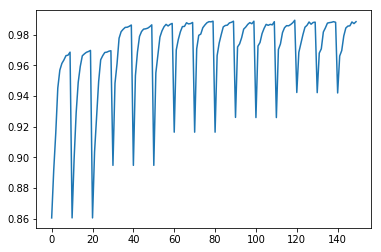

In [12]:
plt.plot(res['mean_test_score'])

In [43]:
# Want to build a plot with 5 curves: one for each max depth, leave learning rate constant at 1
# The params list is a binary count
chunksize = len(param_grid['n_estimators'])
mean_train, std_train, mean_test, std_test, mean_fit, std_fit = {},{},{},{},{},{}

for d in param_grid['base_estimator__max_depth']:
    mean_train[d] = res['mean_train_score'][(3 * d - 1) * chunksize : 3 * d * chunksize]
    std_train[d] = res['std_train_score'][(3 * d - 1) * chunksize : 3 * d * chunksize]
    mean_test[d] = res['mean_test_score'][(3 * d - 1) * chunksize : 3 * d * chunksize]
    std_test[d] = res['std_test_score'][(3 * d - 1) * chunksize : 3 * d * chunksize]
    mean_fit[d] = res['mean_fit_time'][(3 * d - 1) * chunksize : 3 * d * chunksize]
    std_fit[d] = res['std_fit_time'][(3 * d - 1) * chunksize : 3 * d * chunksize]

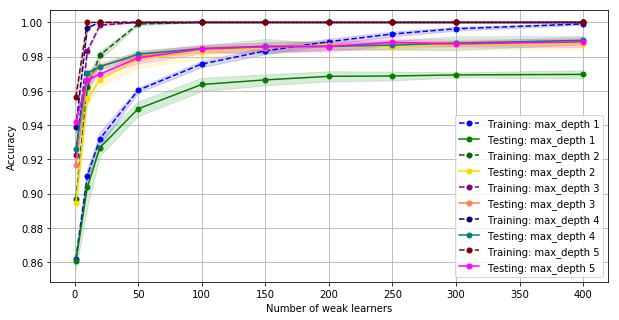

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

train_colors = ['blue', 'darkgreen', 'purple', 'navy', 'maroon']
test_colors = ['green', 'gold', 'coral', 'teal', 'magenta']

for ix, d in enumerate(param_grid['base_estimator__max_depth']):
    ax.plot(param_grid['n_estimators'], mean_train[d],  label='Training: max_depth %i' % d,
            marker='o', color=train_colors[ix], linestyle='--',
            markersize=5)
    ax.fill_between(param_grid['n_estimators'],
                  mean_train[d] + std_train[d],
                  mean_train[d] - std_train[d],
                  alpha=0.15, color=train_colors[ix])
    ax.plot(param_grid['n_estimators'], mean_test[d],  label='Testing: max_depth %i' % d,
            marker='o', color=test_colors[ix], linestyle='-',
            markersize=5)
    ax.fill_between(param_grid['n_estimators'],
                  mean_test[d] + std_test[d],
                  mean_test[d] - std_test[d],
                  alpha=0.15, color=test_colors[ix])

plt.grid()
plt.legend(loc='lower right')
ax.set_ylabel('Accuracy')
plt.xlabel('Number of weak learners')
plt.show()

## Boosting Learning Curve Analysis

In [29]:
# Find best estimator
clf = grid_search.best_estimator_
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 400,
 'random_state': None}

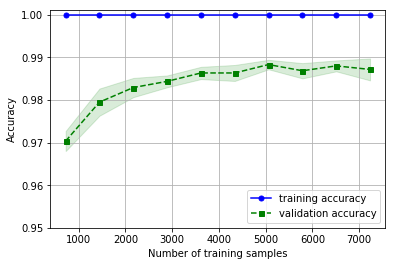

In [34]:
train_sizes, train_scores, test_scores, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train_scaled, y_train, ylim=[0.95, 1.001], cv=4, n_jobs=-1)

#### Trying a weaker learner just for grins

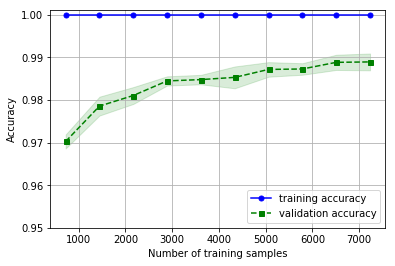

(array([ 723, 1446, 2170, 2893, 3617, 4340, 5063, 5787, 6510, 7234]),
 array([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]),
 array([[ 0.97057605,  0.96807629,  0.96972211,  0.97262547],
        [ 0.97472027,  0.97968491,  0.97967648,  0.98009125],
        [ 0.9830087 ,  0.9805141 ,  0.97801742,  0.98257984],
        [ 0.98549523,  0.98300166,  0.98382414,  0.9854832 ],
        [ 0.98466639,  0.98548922,  0.98299461,  0.98589797],
        [ 0.9830087 ,  0.98424544,  0.98423891,  0.98963086],
        [ 0.98590966,  0.98922056,  0.98506844,  0.98838656],
        [ 0.98508081,  0.98839138,  0.98714226,  0.98838656],
        [ 0.98632408,  0.99004975,  0.9879718 ,  0.99087516],
        [ 0.98715292,  0.99087894,  0.9867275 ,  0.99087516]]),
 array

In [48]:
clf2 = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=400,
    learning_rate=1.0,
)
gen_and_plot_learning_curve(clf2, X_train_scaled, y_train, ylim=[0.95, 1.001], cv=4, n_jobs=-1)

### Timing statistics

In [41]:
scipy.stats.describe(res['mean_fit_time'])

DescribeResult(nobs=150, minmax=(0.37192600965499878, 346.64813816547394), mean=87.134926810661952, variance=7690.7161092195256, skewness=1.0604010559916277, kurtosis=0.3287323226615908)

In [42]:
scipy.stats.describe(res['mean_score_time'])

DescribeResult(nobs=150, minmax=(0.0060653090476989746, 0.82790708541870117), mean=0.2929477099577586, variance=0.063592285611455343, skewness=0.5202133830872548, kurtosis=-0.9741569522352997)

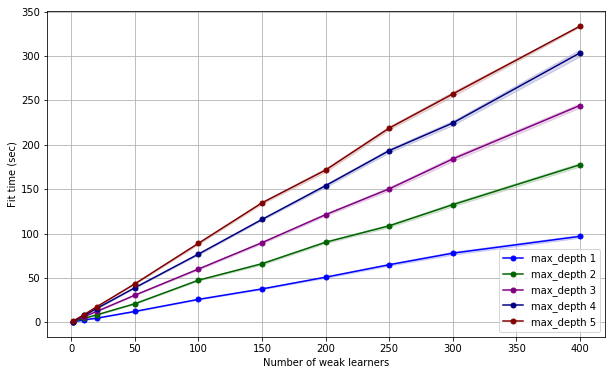

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

train_colors = ['blue', 'darkgreen', 'purple', 'navy', 'maroon']
test_colors = ['green', 'gold', 'coral', 'teal', 'magenta']

for ix, d in enumerate(param_grid['base_estimator__max_depth']):
    ax.plot(param_grid['n_estimators'], mean_fit[d],  label='max_depth %i' % d,
            marker='o', color=train_colors[ix], linestyle='-',
            markersize=5)
    ax.fill_between(param_grid['n_estimators'],
                  mean_fit[d] + std_fit[d],
                  mean_fit[d] - std_fit[d],
                  alpha=0.15, color=train_colors[ix])
plt.grid()
plt.legend(loc='lower right')
ax.set_ylabel('Fit time (sec)')
plt.xlabel('Number of weak learners')
plt.show()